<a href="https://colab.research.google.com/github/sjekic/ChihuahuaOrMuffin/blob/main/ChihuahuaOrMuffin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install keras

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
import kagglehub

path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/muffin-vs-chihuahua-image-classification


In [3]:
print(os.listdir(path))

['test', 'train']


In [5]:
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(150, 150), batch_size=32, shuffle=True)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(150, 150), batch_size=32, shuffle=True)

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


As there are subfolders inside of both the test and train folders tensorflow automatically turns them into classes inside of the newly made train and test datasets. As some images are potentially not the same size, they were resized to 150x150.

In [7]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

As we are working with images that are in color, to optimize the training of a neural network we normalized the pixel values of the images from the range of 0-255 to 0-1.

In [9]:
model1 = tf.keras.Sequential([
    data_augmentation,
    normalization_layer,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The model first performs data augmentation to the training dataset and afterwards the normalization.
In the first layer we specify the input shape (as previously mentioned we resized the images to 150x150) and as they are in color, the third dimension is 3 (each for the red, blue and green channel).
In the hidden layers we used the ReLU as it is the default choice and because it minimizes the risk of the vanishing gradient. The final layer uses the sigmoid function as we are here trying to perform binary classification.

In [10]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model1.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.5368 - loss: 0.8301 - val_accuracy: 0.5988 - val_loss: 0.6241
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.7518 - loss: 0.5202 - val_accuracy: 0.8378 - val_loss: 0.3995
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.8114 - loss: 0.4157 - val_accuracy: 0.8606 - val_loss: 0.3418
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.8343 - loss: 0.3749 - val_accuracy: 0.8514 - val_loss: 0.3368
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8668 - loss: 0.3121 - val_accuracy: 0.8640 - val_loss: 0.3071
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.8652 - loss: 0.3268 - val_accuracy: 0.8834 - val_loss: 0.2695
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.8771 - loss: 0.2893 - val_accuracy: 0.8581 - val_loss: 0.3439
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.8792 - loss: 0.2750 - val_accu

In [ ]:
model2 = tf.keras.Sequential([
    data_augmentation,
    normalization_layer,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model2.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.6133 - loss: 0.6446 - val_accuracy: 0.7728 - val_loss: 0.4906
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8041 - loss: 0.4526 - val_accuracy: 0.8167 - val_loss: 0.3825
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8545 - loss: 0.3529 - val_accuracy: 0.7804 - val_loss: 0.4411
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.8616 - loss: 0.3303 - val_accuracy: 0.8682 - val_loss: 0.3297
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.8760 - loss: 0.3062 - val_accuracy: 0.8860 - val_loss: 0.2966
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.8849 - loss: 0.2897 - val_accuracy: 0.8775 - val_loss: 0.2969
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.8918 - loss: 0.2677 - val_accuracy: 0.8961 - val_loss: 0.2742
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8865 - loss: 0.2779 - val_accu

We tried out 2 models that differ in the number of layers. By adding another layer to the second model we noticed a decline in epoch 10 which could potentially indicate overfitting. Because the first model was fitting the data better

In [12]:
model1.save('model1.h5')

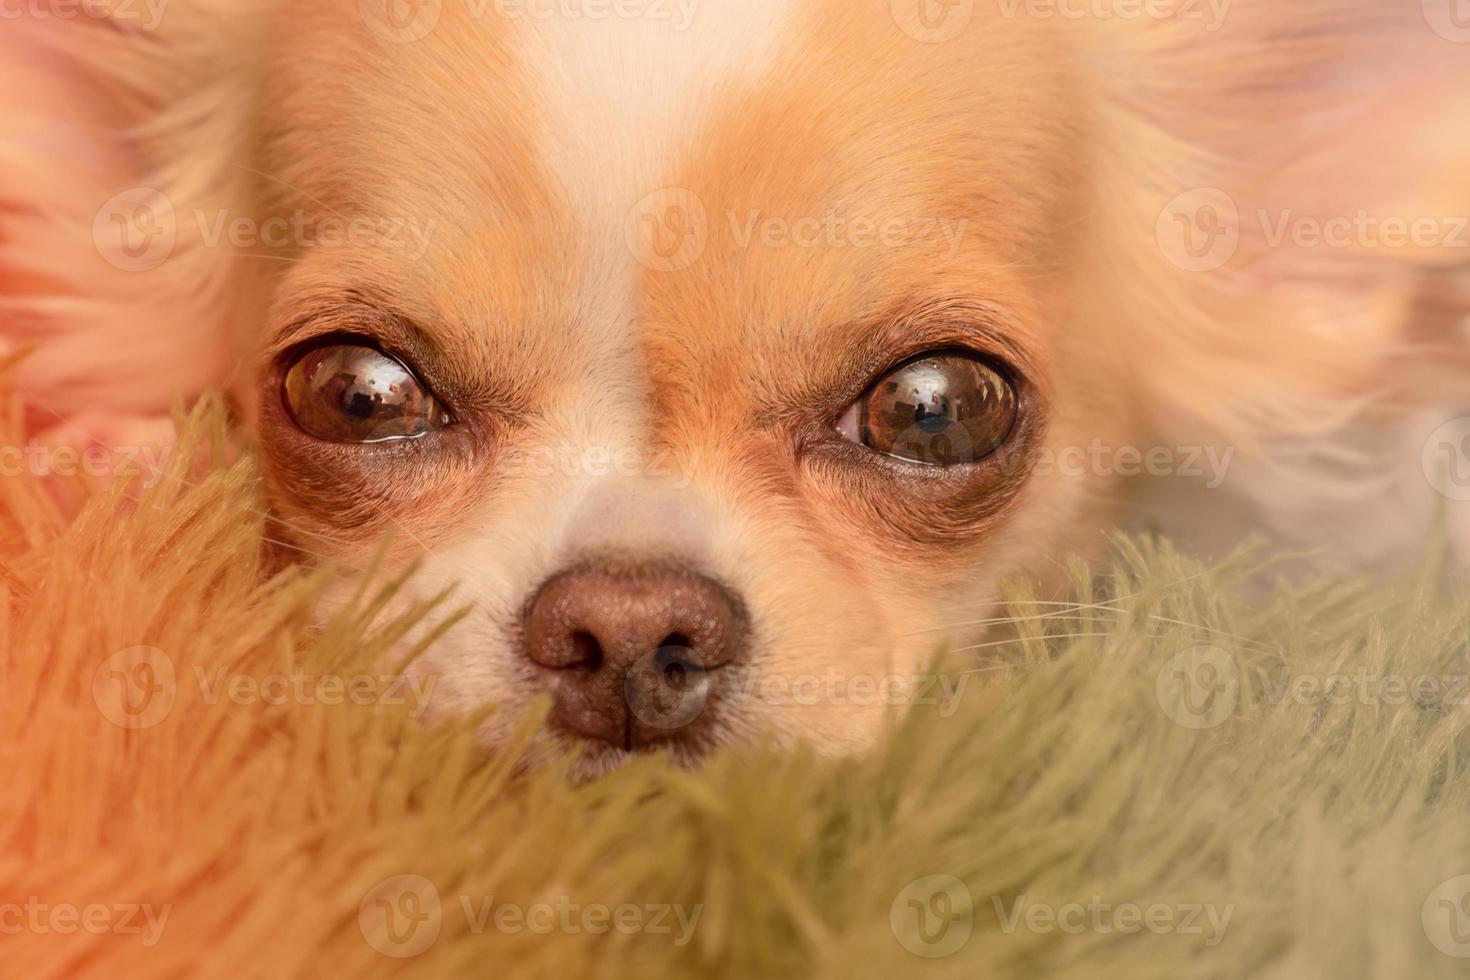

In [28]:
from tensorflow.keras.preprocessing import image

model1 = tf.keras.models.load_model('model1.h5')

img_path = '/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua/img_1_505.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model1.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Prediction raw output: 0.1787707358598709
It's a Chihuahua!


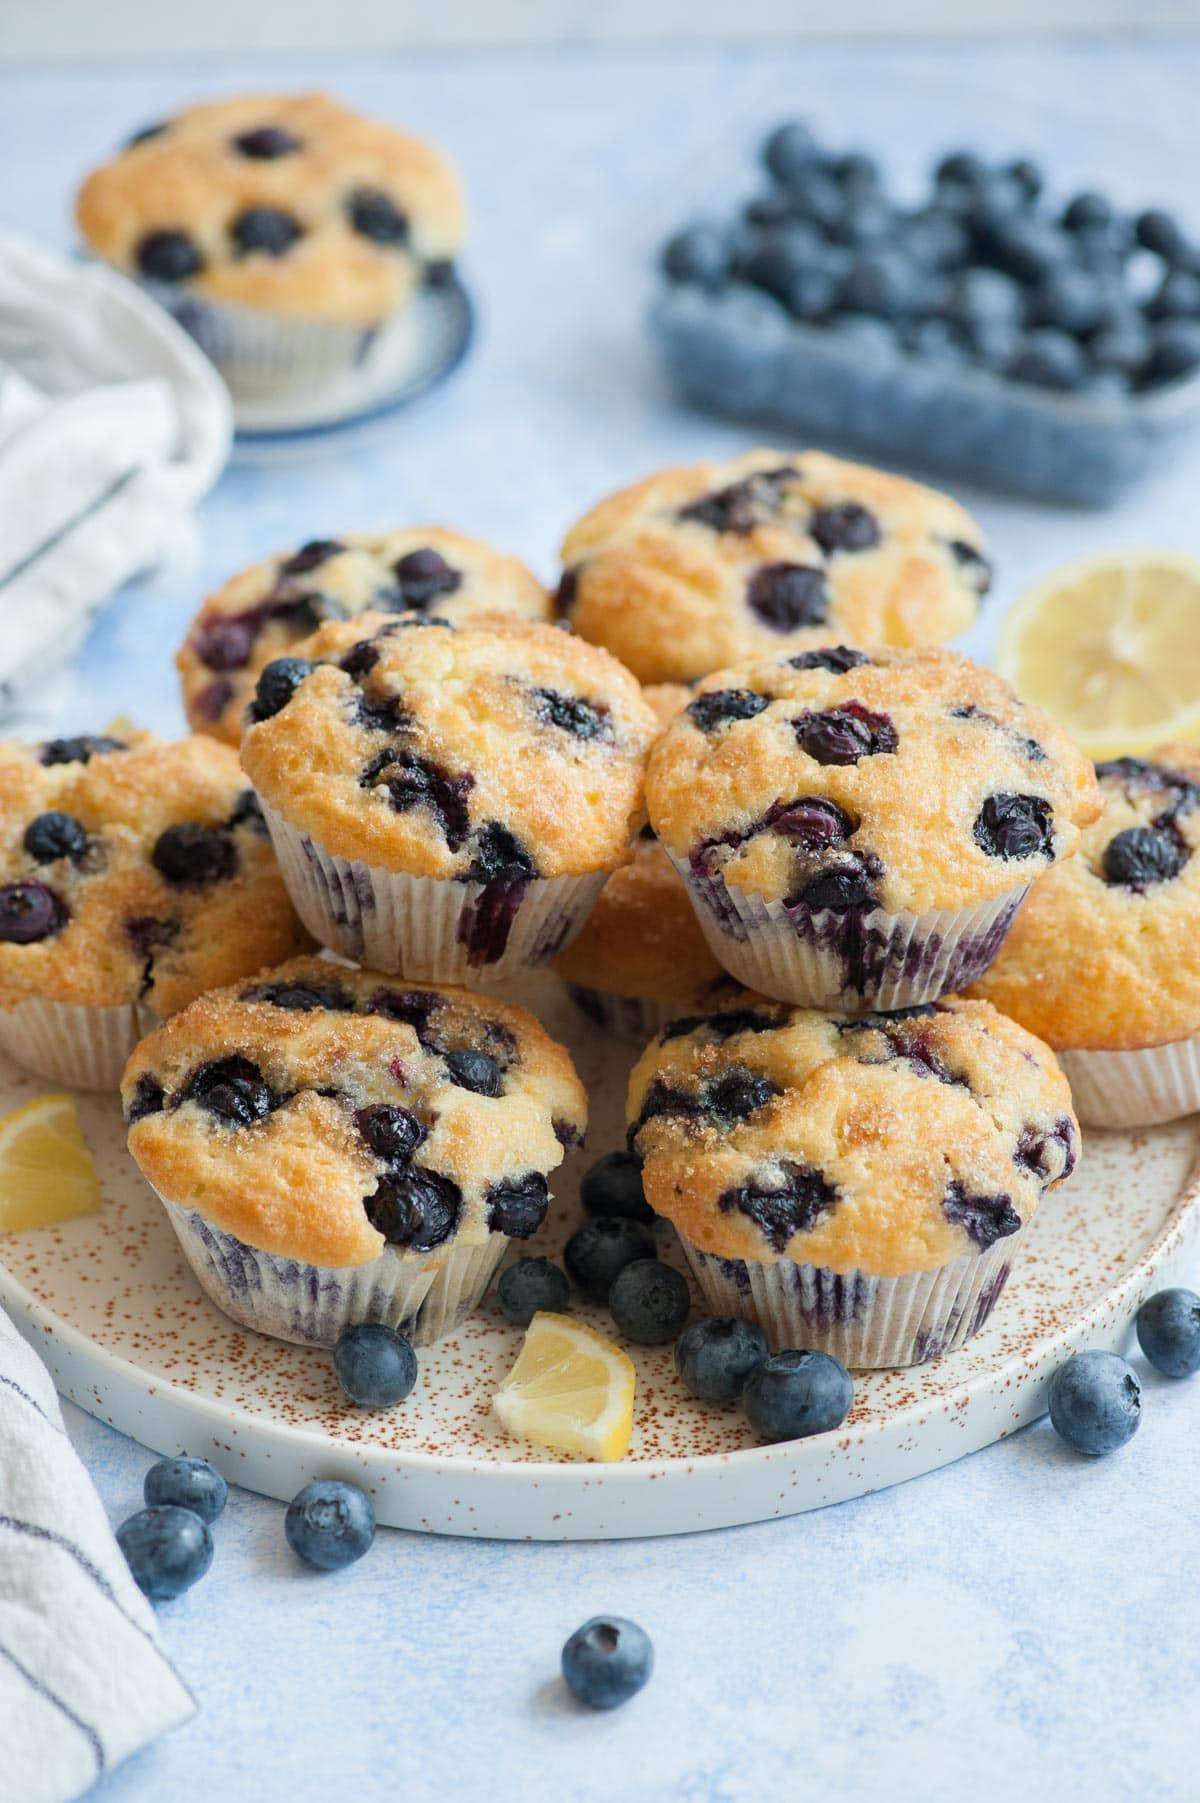

In [29]:
from tensorflow.keras.preprocessing import image

model1 = tf.keras.models.load_model('model1.h5')

img_path = '/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_0_10.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model1.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Prediction raw output: 0.9920579791069031
It's a Muffin!


In [17]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                                include_top=False,
                                                weights='imagenet')

base_model.trainable = False

modelMNV2 = tf.keras.Sequential([
    data_augmentation,
    normalization_layer,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelMNV2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


<ipython-input-17-4bcd1f608ee1>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
history = modelMNV2.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=5
)


Epoch 1/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 155s 995ms/step - accuracy: 0.9195 - loss: 0.1967 - val_accuracy: 0.9856 - val_loss: 0.0373
Epoch 2/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9784 - loss: 0.0613 - val_accuracy: 0.9882 - val_loss: 0.0407
Epoch 3/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9784 - loss: 0.0535 - val_accuracy: 0.9873 - val_loss: 0.0324
Epoch 4/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9796 - loss: 0.0481 - val_accuracy: 0.9890 - val_loss: 0.0300
Epoch 5/5
148/148 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.9858 - loss: 0.0373 - val_accuracy: 0.9907 - val_loss: 0.0302


In [19]:
modelMNV2.save('modelMobileNetV2.h5')

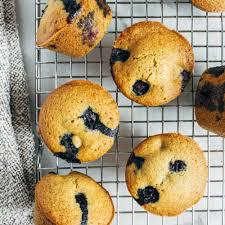

In [30]:
modelMNV2 = tf.keras.models.load_model('modelMobileNetV2.h5')

img_path = '/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_0_869.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = modelMNV2.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction raw output: 0.9975512623786926
It's a Muffin!


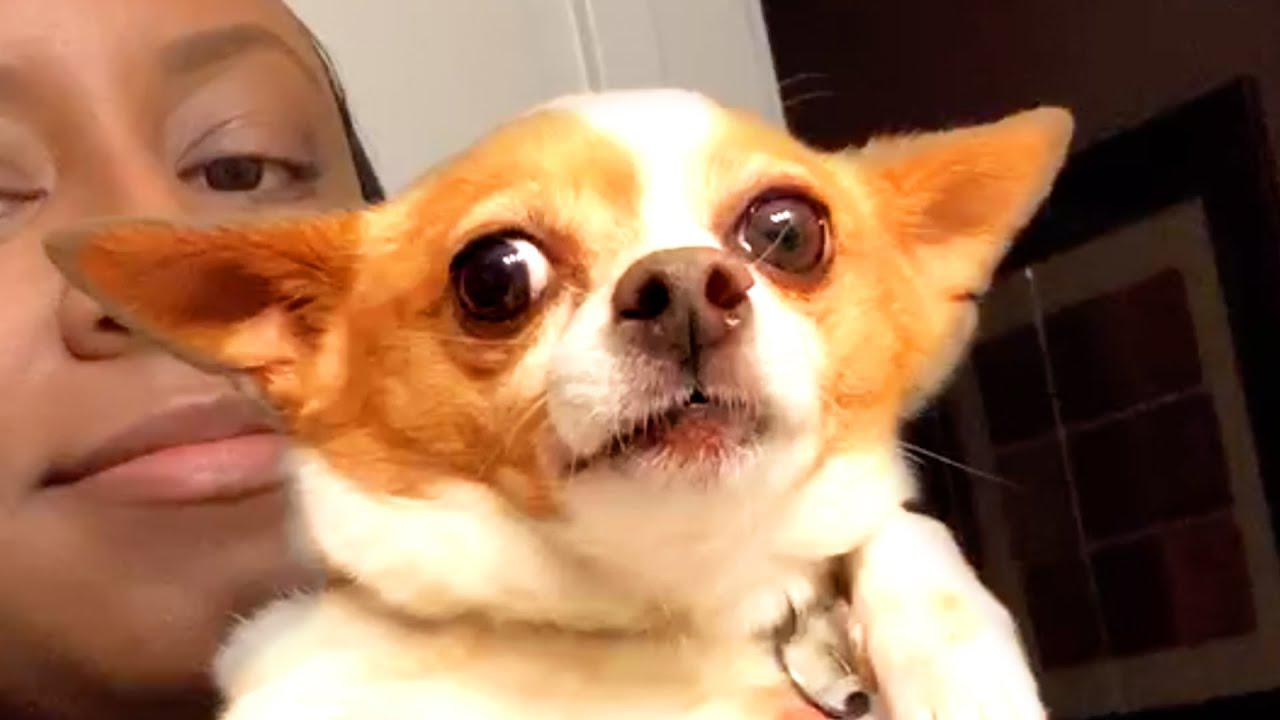

In [31]:
modelMNV2 = tf.keras.models.load_model('modelMobileNetV2.h5')

img_path = '/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua/img_3_1021.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = modelMNV2.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction raw output: 6.733611712661514e-07
It's a Chihuahua!


And a tricky one... is this a muffin or a chihuahua? Are you any better than AI?

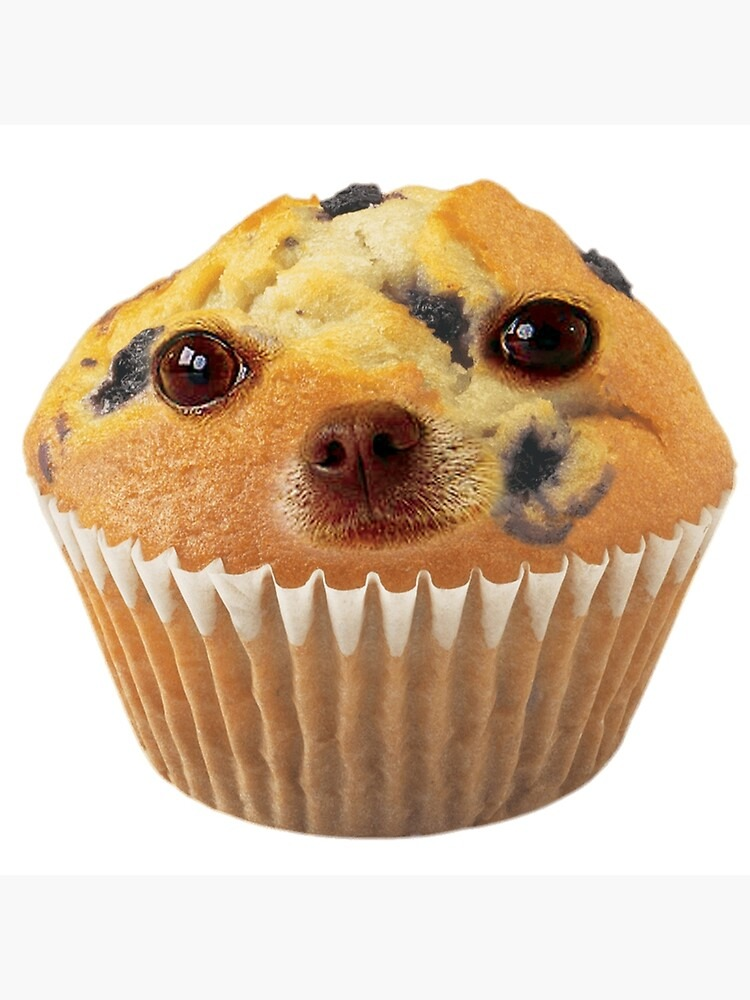

In [32]:
model1 = tf.keras.models.load_model('model1.h5')

img_path = '/chihuahuaormuffin.jpeg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = model1.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Prediction raw output: 0.9764675498008728
It's a Muffin!


In [33]:
modelMNV2 = tf.keras.models.load_model('modelMobileNetV2.h5')

img_path = '/chihuahuaormuffin.jpeg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.cast(img_array, tf.float32)
img_array = tf.expand_dims(img_array, axis=0)

prediction = modelMNV2.predict(img_array)

print(f"Prediction raw output: {prediction[0][0]}")

if prediction[0][0] < 0.5:
    print("It's a Chihuahua!")
else:
    print("It's a Muffin!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction raw output: 0.9996886849403381
It's a Muffin!
